# Recommendation Chatbot API: llama2 vs llama3 evaluation analisys 

In [1]:
%%capture output
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

BASE_PATH         = '../..'
API_PATH          = f'{BASE_PATH}/chat-bot-api'
LIB_PATH          = f'{BASE_PATH}/lib'
METRICS_PATH      = f'{BASE_PATH}/metrics'

sys.path.append(LIB_PATH)
sys.path.append(API_PATH)

In [3]:
import logging
import os
import pytorch_common.util as pu
import util as ut
from client import RecChatBotV1ApiClient
from models import EvaluationState
import seaborn as sns
import pandas as pd
from models.evaluation import (
    plot_mean_ndcg_evolutions, 
    plot_mean_avg_precision_evolutions, 
    plot_mean_reciprocal_rank_evolutions,
    plot_mean_recall_evolutions
)
import matplotlib.pyplot as plt
import numpy as np

import data.plot as dp

import metric as mt

<Figure size 640x480 with 0 Axes>

## Helper functions

## Setup

In [4]:
def on_file(file_path, format='%(asctime)s - %(levelname)s - %(message)s'):
    handler = logging.FileHandler(file_path)
    handler.setFormatter(logging.Formatter(format))
    return handler


pu.LoggerBuilder() \
    .handler(on_file('./evaluation.log'))\
    .on_console() \
    .build()

<RootLogger root (INFO)>

In [5]:
llama2_sessions = EvaluationState.load(f'{METRICS_PATH}/evaluation-metrics-llama2.dt').sessions
llama3_sessions = EvaluationState.load(f'{METRICS_PATH}/evaluation-metrics-llama3.dt').sessions

## Metrics evolution comparation

(0.945, 0.985)

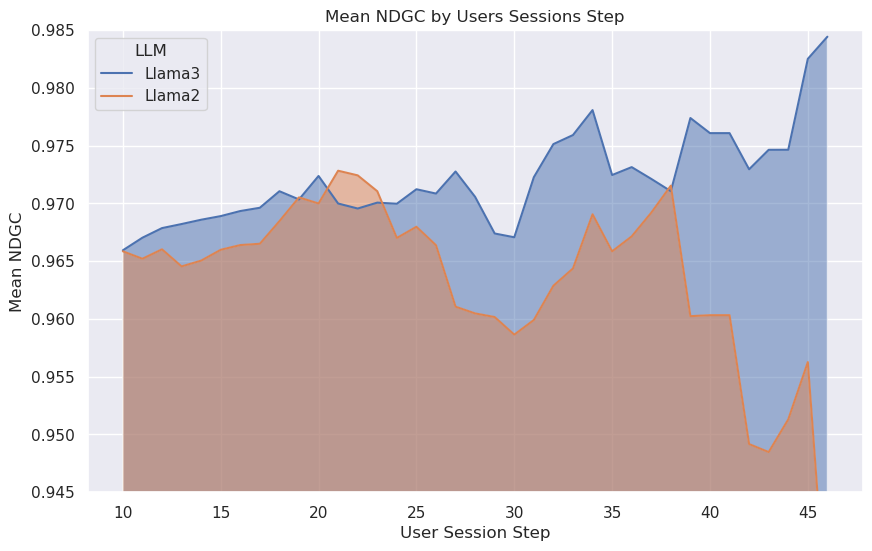

In [6]:
plot_mean_ndcg_evolutions(llama2_sessions, llama3_sessions, moving_avg_window = 10)
plt.ylim(0.945, 0.985)

(0.31, 0.55)

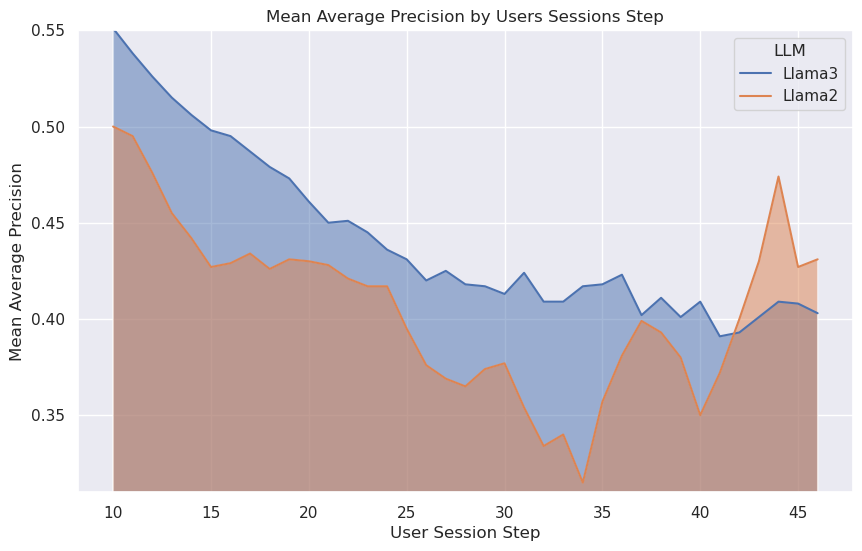

In [7]:
plot_mean_avg_precision_evolutions(llama2_sessions, llama3_sessions, moving_avg_window = 10)
plt.ylim(0.31, 0.55)

(0.55, 0.94)

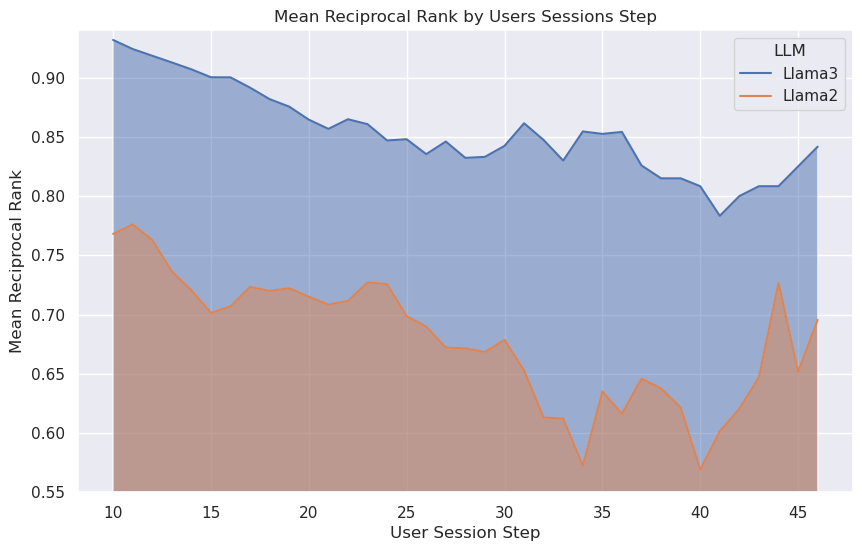

In [8]:
plot_mean_reciprocal_rank_evolutions(llama2_sessions, llama3_sessions, moving_avg_window = 10)
plt.ylim(0.55, 0.94)

(0.49, 0.605)

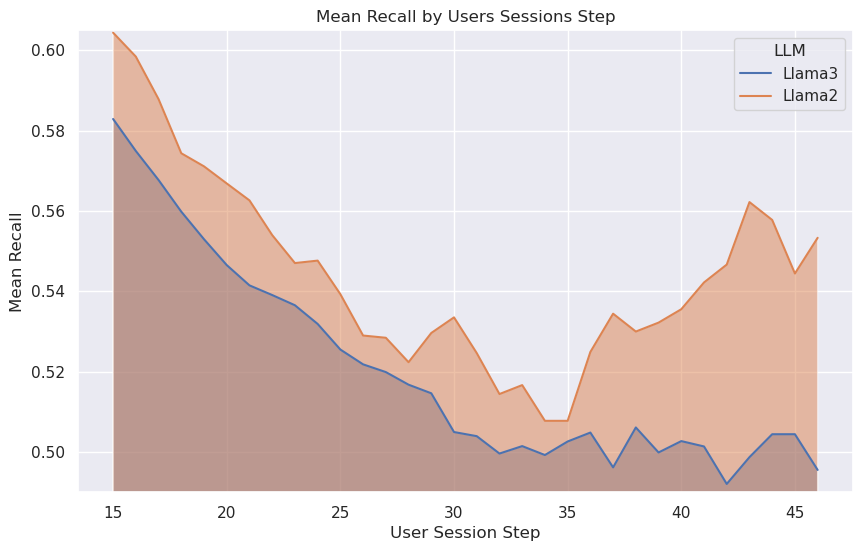

In [9]:
plot_mean_recall_evolutions(llama2_sessions, llama3_sessions, moving_avg_window = 15)
plt.ylim(0.49, 0.605)

## Mean/Median diference tests

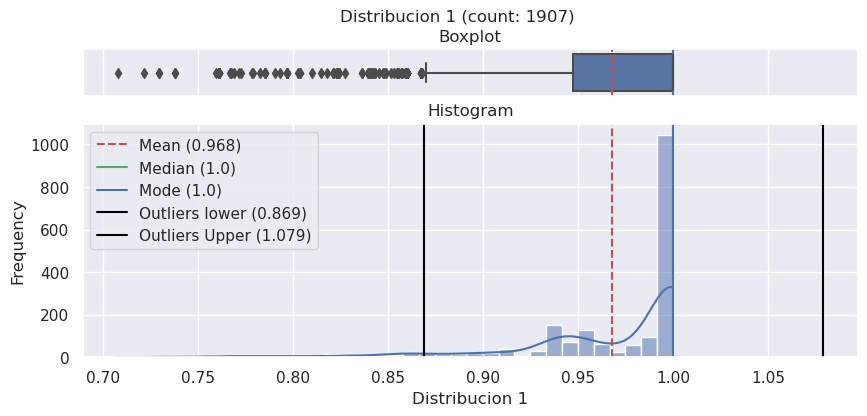

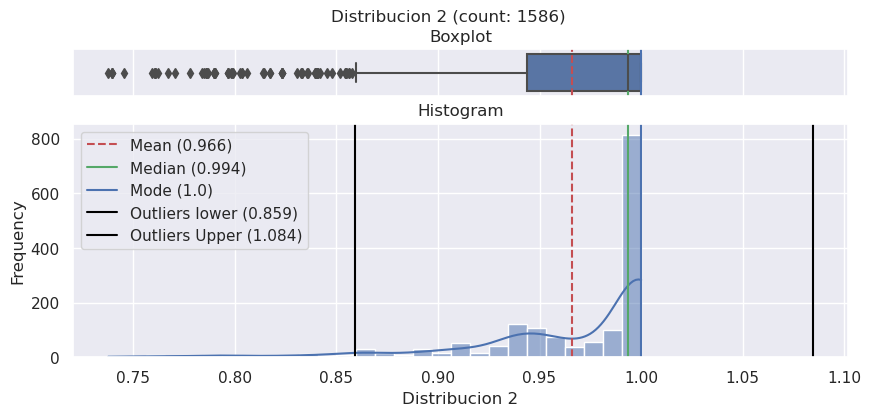



Prueba T-Student de diferencia de medias entre las distribuciones 1 y 2:

- Tamaño de las muestras: Dist1(1907), Dist2(1586).
- No se cumples todos los supuestos.
- Estadístico: 1.0633607021365257
- P-value: 0.30252137090810516
- No se puede rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que existe una diferencia significativa entre las medias de las distribuciones.

Supuestos:

    Prueba de normalidad para distribución 1:
    - Estadístico: 0.6973041296005249
    - P-value: 0.0

    Prueba de normalidad para distribución 2:
    - Estadístico: 0.7258697748184204
    - P-value: 4.203895392974451e-45

    Prueba de homogeneidad de varianzas:
    - Estadístico: 1.0633607021365257
    - P-value: 0.30252137090810516

    Resultados:
    - No se cumple el supuesto de normalidad una o ambas distribuciones.
    - Se cumple el supuesto homogeneidad de las varianzas de las distribuciones.

In [10]:
mt.TStudentTest()(llama3_sessions.ndcg, llama2_sessions.ndcg)

In [11]:
mt.MannWhitneyWilcoxonTest()(llama3_sessions.ndcg, llama2_sessions.ndcg)



Prueba de Mann Whiney - Wilcoxon para la comparación de medianas:

- Tamaño de las muestras: Dist1(1907), Dist2(1586).
- Estadístico: 1562883.5
- P-value: 0.06659194511845572 (>=0.05)
- No se puede rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que existe una diferencia estadísticamente significativa entre las medianas de los grupos.

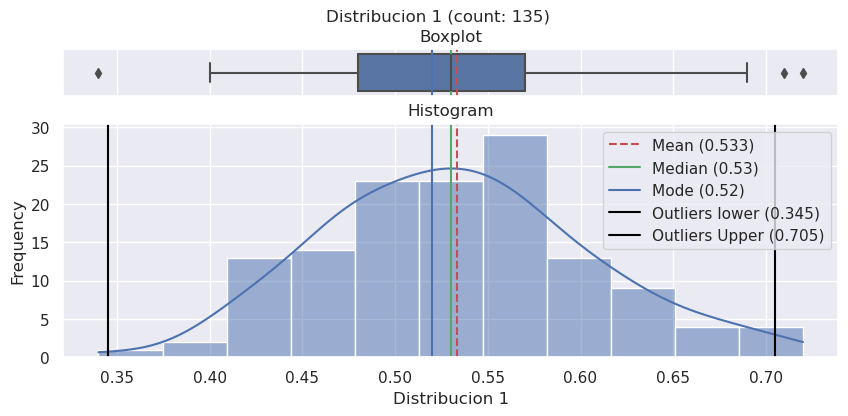

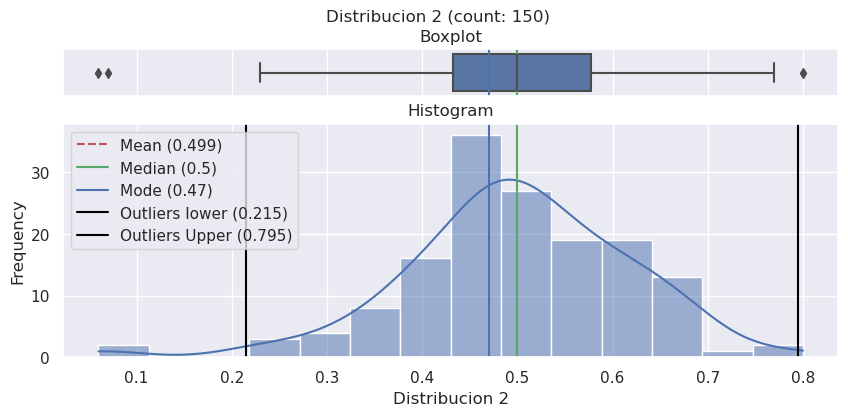



Prueba T-Student de diferencia de medias entre las distribuciones 1 y 2:

- Tamaño de las muestras: Dist1(135), Dist2(150).
- No se cumples todos los supuestos.
- Estadístico: 18.19846984926139
- P-value: 2.716867076693802e-05
- Se rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre las medias de las distribuciones.

Supuestos:

    Prueba de normalidad para distribución 1:
    - Estadístico: 0.989579439163208
    - P-value: 0.40847620368003845

    Prueba de normalidad para distribución 2:
    - Estadístico: 0.9727873802185059
    - P-value: 0.004488214384764433

    Prueba de homogeneidad de varianzas:
    - Estadístico: 18.19846984926139
    - P-value: 2.716867076693802e-05

    Resultados:
    - No se cumple el supuesto de normalidad una o ambas distribuciones.
    - No se cumple el supuesto homogeneidad de las varianzas de las distribuciones.

In [12]:
mt.TStudentTest()(llama3_sessions.mean_average_precision, llama2_sessions.mean_average_precision)

In [13]:
mt.MannWhitneyWilcoxonTest()(llama3_sessions.mean_average_precision, llama2_sessions.mean_average_precision)



Prueba de Mann Whiney - Wilcoxon para la comparación de medianas:

- Tamaño de las muestras: Dist1(135), Dist2(150).
- Estadístico: 11963.0
- P-value: 0.008115716956419362 (<0.05)
- Se rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre las medianas de los grupos.

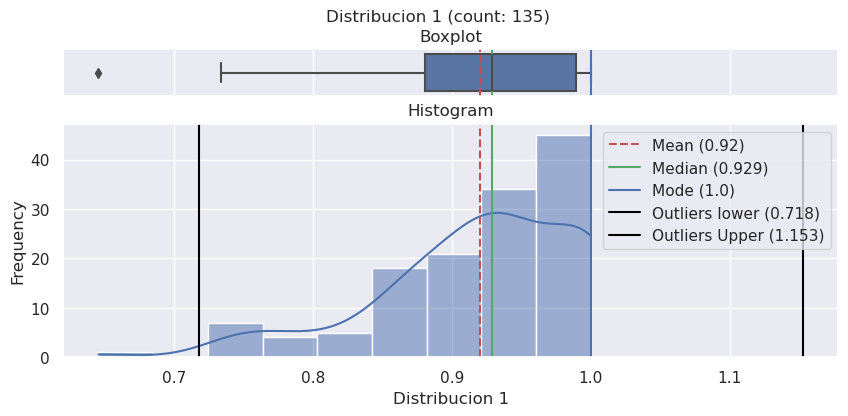

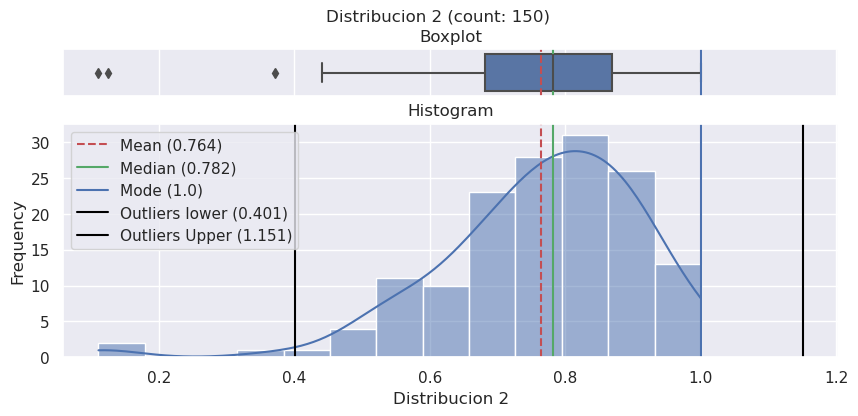



Prueba T-Student de diferencia de medias entre las distribuciones 1 y 2:

- Tamaño de las muestras: Dist1(135), Dist2(150).
- No se cumples todos los supuestos.
- Estadístico: 34.91356181280426
- P-value: 9.880706204285702e-09
- Se rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre las medias de las distribuciones.

Supuestos:

    Prueba de normalidad para distribución 1:
    - Estadístico: 0.8967825770378113
    - P-value: 3.309805407525346e-08

    Prueba de normalidad para distribución 2:
    - Estadístico: 0.9242035150527954
    - P-value: 4.002255309387692e-07

    Prueba de homogeneidad de varianzas:
    - Estadístico: 34.91356181280426
    - P-value: 9.880706204285702e-09

    Resultados:
    - No se cumple el supuesto de normalidad una o ambas distribuciones.
    - No se cumple el supuesto homogeneidad de las varianzas de las distribuciones.

In [14]:
mt.TStudentTest()(
    llama3_sessions.mean_reciprocal_rank,
    llama2_sessions.mean_reciprocal_rank
)

In [15]:
mt.MannWhitneyWilcoxonTest()(llama3_sessions.mean_reciprocal_rank, llama2_sessions.mean_reciprocal_rank)



Prueba de Mann Whiney - Wilcoxon para la comparación de medianas:

- Tamaño de las muestras: Dist1(135), Dist2(150).
- Estadístico: 17081.5
- P-value: 1.1463643706129549e-23 (<0.05)
- Se rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre las medianas de los grupos.

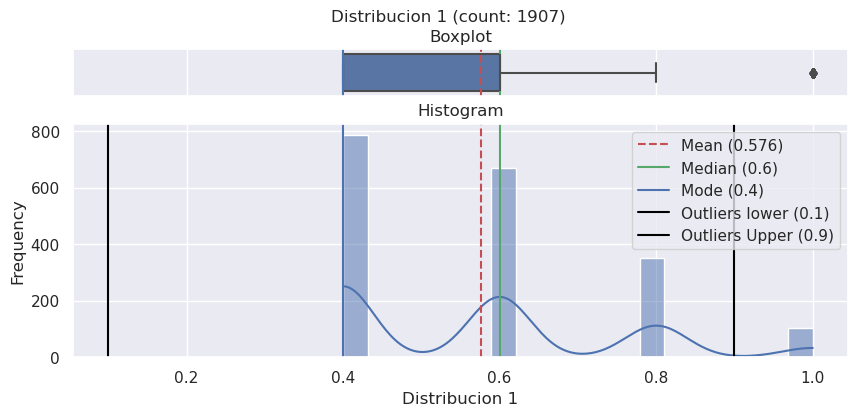

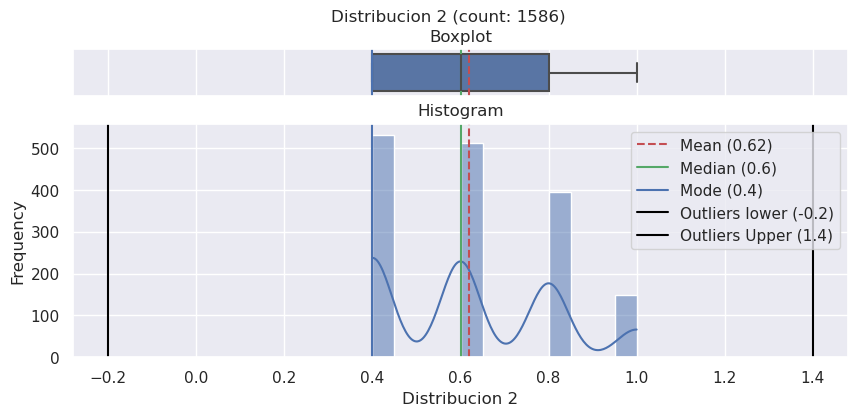



Prueba T-Student de diferencia de medias entre las distribuciones 1 y 2:

- Tamaño de las muestras: Dist1(1907), Dist2(1586).
- No se cumples todos los supuestos.
- Estadístico: 11.419462260143618
- P-value: 0.0007347600262321061
- Se rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre las medias de las distribuciones.

Supuestos:

    Prueba de normalidad para distribución 1:
    - Estadístico: 0.8189252614974976
    - P-value: 5.578569186477097e-42

    Prueba de normalidad para distribución 2:
    - Estadístico: 0.8523048162460327
    - P-value: 3.991537646278523e-36

    Prueba de homogeneidad de varianzas:
    - Estadístico: 11.419462260143618
    - P-value: 0.0007347600262321061

    Resultados:
    - No se cumple el supuesto de normalidad una o ambas distribuciones.
    - No se cumple el supuesto homogeneidad de las varianzas de las distribuciones.

In [16]:
mt.TStudentTest()(llama3_sessions.recall, llama2_sessions.recall)

In [17]:
mt.MannWhitneyWilcoxonTest()(llama3_sessions.recall, llama2_sessions.recall)



Prueba de Mann Whiney - Wilcoxon para la comparación de medianas:

- Tamaño de las muestras: Dist1(1907), Dist2(1586).
- Estadístico: 1324310.0
- P-value: 2.3244695579466005e-11 (<0.05)
- Se rechaza la hipótesis nula. Hay una diferencia estadísticamente significativa entre las medianas de los grupos.